## Mutual information

The mutual information measures the reduction in uncertainty in variable A when variable B is known. 

To select variables, we are interested in the mutual information between the predictor variables and the target. Higher mutual information values, indicate little uncertainty about the target Y given the predictor X.

[Mutual Information, Wikipedia](https://en.wikipedia.org/wiki/Mutual_information):

Using Scikit-learn, we can determine the mutual information between a variable and the target using the mutual_info_classif or mutual_info_regression for binary or continuous targets.

In [9]:
# import libaries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# to get mutual information values
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select features
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [2]:
# load data

data = pd.read_csv('..\precleaned-datasets\dataset_2.csv')
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [3]:
# # separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

### Determine Mutual Information

In [4]:
# calculate the mutual information between the variables and the target

# the smaller the value of the mi, the less information we can infer from
# the feature about the target
mi = mutual_info_classif(X_train, y_train)
mi

array([0.00000000e+00, 3.59692865e-03, 0.00000000e+00, 7.90106664e-04,
       4.46324392e-04, 5.18389567e-03, 5.07292700e-03, 2.85507539e-03,
       0.00000000e+00, 1.91047527e-04, 9.60030136e-04, 7.80778880e-04,
       7.78894411e-04, 5.05502381e-03, 0.00000000e+00, 1.28661682e-02,
       0.00000000e+00, 0.00000000e+00, 1.26859512e-04, 0.00000000e+00,
       3.97314147e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.16382344e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.48714896e-03, 1.51381008e-03, 0.00000000e+00, 0.00000000e+00,
       4.75489413e-03, 1.69021289e-02, 0.00000000e+00, 1.97525510e-03,
       1.74960009e-04, 2.06574353e-03, 3.38554512e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.13940837e-03,
       1.60435662e-03, 1.85600741e-03, 0.00000000e+00, 4.35636003e-03,
       0.00000000e+00, 2.14897390e-04, 0.00000000e+00, 2.88567249e-03,
       0.00000000e+00, 3.66360601e-03, 4.07151781e-02, 1.56832109e-03,
      

In [5]:
# 1) let's capture the above array in a pandas series
# 2)add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a bar plot

mi = pd.Series(mi)
mi.index = X_train.columns

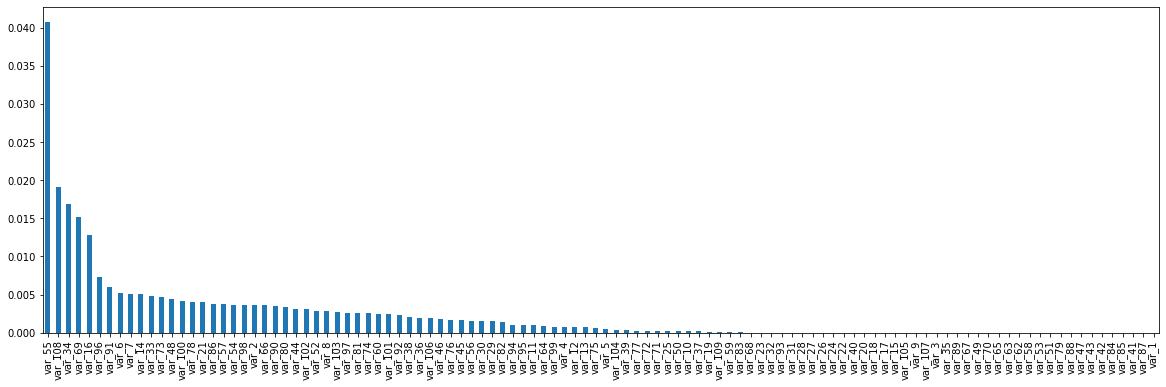

In [12]:
# plot the bar chat
mi.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.show();

There are a few features (left of the plot) with higher mutual information values. There are also features with almost zero MI values on the right of the plot.

Once we find the mutual information values, to select features we need to determine a threshold, or cut-off value, above which a feature will be selected.

There are a few ways in which this can be done:

- Select top k features, where k is an arbitrary number of features

- Select features in the top n percentile, where n is again an arbitrary number

- Select all features above a certain threshold of MI, arbitrarily decided.

Scikit-learn transformer **SelectKBest**, allows us to automatically select the top k features, based of any statistical value, including the MI.

Sklearn's **SelectPercentile** allows us to select the features in the top percentile of any statistical value, including the MI.

Alternatively, if we want to select features based on a MI threshold, we can do it manually.

### Select top k features based on MI

In [14]:
# here we will select the top 10 features
# based on their mutual information value

# select features
sel_ = SelectKBest(mutual_info_classif,k=10).fit(X_train.fillna(0), y_train)

In [16]:
# display features
X_train.columns[sel_.get_support()]

Index(['var_6', 'var_14', 'var_16', 'var_34', 'var_48', 'var_55', 'var_69',
       'var_91', 'var_96', 'var_108'],
      dtype='object')

In [17]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [18]:
X_train.shape

(35000, 10)

## Determine Mutual Information - Regression

## Regression

In [19]:
# load data - we will be using house price data

data = pd.read_csv('house_price.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
data.shape

(1460, 81)

In [22]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [23]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [24]:
## fill missing values

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

## Get the mutual information values

In [26]:
mi = mutual_info_regression(X_train, y_train)

In [27]:
mi

array([0.        , 0.25546983, 0.21543456, 0.16627848, 0.51917435,
       0.1163415 , 0.34620306, 0.24440214, 0.10706808, 0.16028946,
       0.00821375, 0.10919055, 0.38335373, 0.31131846, 0.22867203,
       0.01813645, 0.48145253, 0.02217526, 0.        , 0.27354435,
       0.07499311, 0.04207525, 0.02600872, 0.1888752 , 0.18265275,
       0.26901121, 0.36942841, 0.36631521, 0.07181851, 0.16634867,
       0.00853705, 0.00981022, 0.00623091, 0.0046582 , 0.        ,
       0.        , 0.        ])

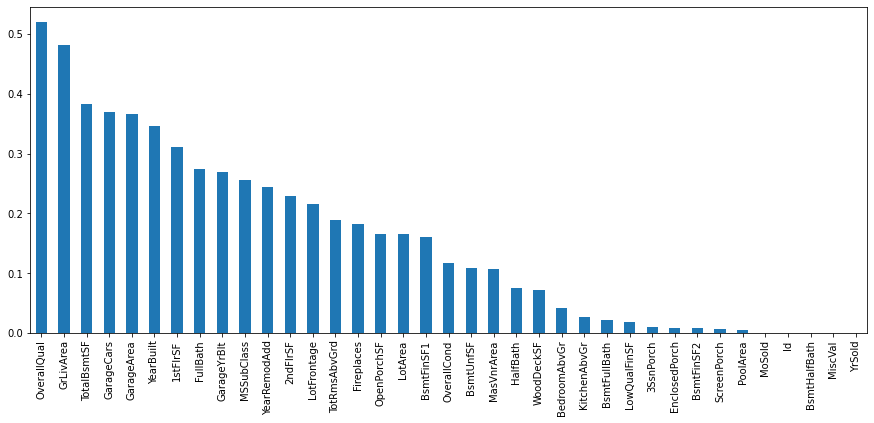

In [29]:
mi = pd.Series(mi)
mi.index= X_train.columns
mi = mi.sort_values(ascending = False)
mi.plot.bar(figsize = (15, 6))
plt.show();

In [32]:
## Select the 10th percentile of the features

sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train, y_train)

In [35]:
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageArea'], dtype='object')